# German Credit Risk Prediction 

## **___Problem statement:___**
   **A dataset that records the credit risk of 1000 risk in German Bank Dataset is given.In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.**

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__

### Type of Machine Learning task :
- It is an classification problem where given a set of features we need to predict the risk of loan from one to another.

### Performace Metric
- Since it is an classification problem we will use f1 score metrics

### Step 1: Importing the Relevant Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from IPython.display import display, Markdown, Latex

### Step 2: Data Inspection

In [2]:
os.chdir(r"C:\Users\vishw\Pictures\project")
os.getcwd()

'C:\\Users\\vishw\\Pictures\\project'

In [3]:
risk = pd.read_csv("german_credit_data.csv")

In [4]:
risk.shape

(1000, 10)

In [5]:
#ratio of null values
risk.isnull().sum()/risk.shape[0] *100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

* ___We have missing values of 18.3% in Saving account and 39.4% in Checking account___

In [6]:
display(Markdown("#### Explore the Values of Text Columns:"))
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for col in cols:
    line = "**" + col + ":** "
    for v in risk[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

#### Explore the Values of Text Columns:

**Sex:** male, female, 

**Housing:** own, free, rent, 

**Saving accounts:** nan, little, quite rich, rich, moderate, 

**Checking account:** little, moderate, nan, rich, 

**Purpose:** radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others, 

**Risk:** good, bad, 

From above exploration:

- Columns "Housing", "Saving accounts" and "Checking accounts" are **Ordinal data**.
- Columns "Sex", "Purpose" and "Risk" are **Categorical data**.

In [7]:
#categorical features
categorical = risk.select_dtypes(include =[np.object])
print("Categorical Features in Credit Risk Data Set:",categorical.shape[1])

#numerical features
numerical= risk.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Credit Risk Data Set:",numerical.shape[1])

Categorical Features in Credit Risk Data Set: 6
Numerical Features in Credit Risk Data Set: 4


In [8]:
risk.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


The maximum cerdit amount is 18424 and minimum cerdit amount is 250

### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [9]:
risk.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

**checking accounts** are primarily for accessing your money for daily and **saving accounts** are primarily for saving money and can be accessed once in a month.

**Data Pre-processing For Ordinal Columns :**

Known from Content in the dataset page, column "Job" is Ordinal data that:

- 0 - unskilled and non-resident,
- 1 - unskilled and resident,
- 2 - skilled,
- 3 - highly skilled

SO, apply the save logic to other Ordinal columns **"Housing", "Saving accounts" and "Checking accounts".**

For "Saving accounts" and "Checking accounts":

- 0 - missing value, as UNKNOWN
- 1 - little
- 2 - moderate
- 3 - quite rich
- 4 - rich

For "Housing":

- 0 - free
- 1 - rent
- 2 - own

In [10]:
# label encode account quality and fill NaN with 0
def SC_LabelEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

In [11]:
risk["Saving accounts"] = risk["Saving accounts"].apply(SC_LabelEncoder)
risk["Checking account"] = risk["Checking account"].apply(SC_LabelEncoder)

In [12]:
# label encode account quality and fill NaN with 0
def H_LabelEncoder(text):
    if text == "free":
        return 0
    elif text == "rent":
        return 1
    elif text == "own":
        return 2

In [13]:
risk["Housing"] = risk["Housing"].apply(H_LabelEncoder)

In [14]:
risk.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,2,0,1,1169,6,radio/TV,good
1,22,female,2,2,1,2,5951,48,radio/TV,bad
2,49,male,1,2,1,0,2096,12,education,good
3,45,male,2,0,1,1,7882,42,furniture/equipment,good
4,53,male,2,0,1,1,4870,24,car,bad


**Data Pre-processing For Discrete Categorical Columns :**

For "Sex":

- 0 - female
- 1 - male

For "Purpose":
- 0 - business
- 1 - car
- 2 - vacation/others
- 3 - education
- 4 - furniture/equipment
- 5 - radio/TV
- 6 - repairs
- 7 - domestic appliances

For "Risk":

- 0 - bad
- 1 - good

In [15]:
# use LabelEncoder() to encode other categorical columns:
for col in ["Sex", "Purpose", "Risk"]:
    le = LabelEncoder()
    le.fit(risk[col])
    risk[col] = le.transform(risk[col])
risk.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,0,1,1169,6,5,1
1,22,0,2,2,1,2,5951,48,5,0
2,49,1,1,2,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0


### Step 4: Exploratory Data Analysis

In [16]:
risk.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Text(0.5, 1.0, 'Age Distribution with Risk')

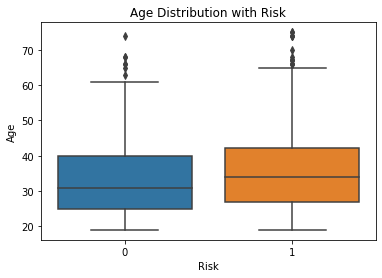

In [17]:
## Risk vs Age
sns.boxplot(data=risk, x='Risk', y='Age').set_title("Age Distribution with Risk")

Age does not affect the risk rating much

Female have lower percentage of bad rating than male.

Text(0.5, 1.0, 'Duration (in month) Distribution')

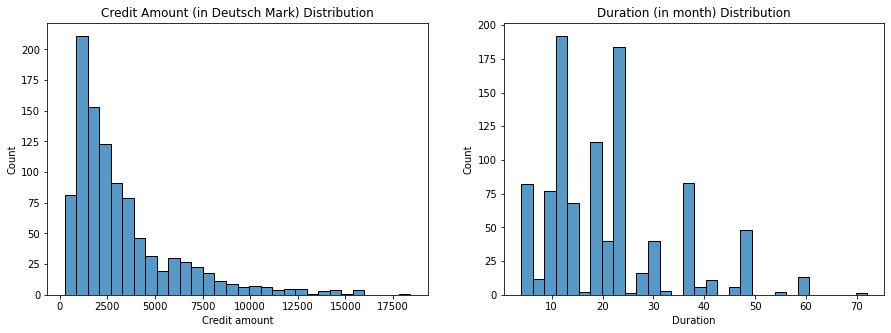

In [18]:
## histogram of Credit amount and Duration
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(risk, x='Credit amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution")
sns.histplot(risk, x='Duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution")

The higher credit amount and longer duration means higher risk to the bank.

Text(0.5, 1.0, 'Housing Distribution with Risk')

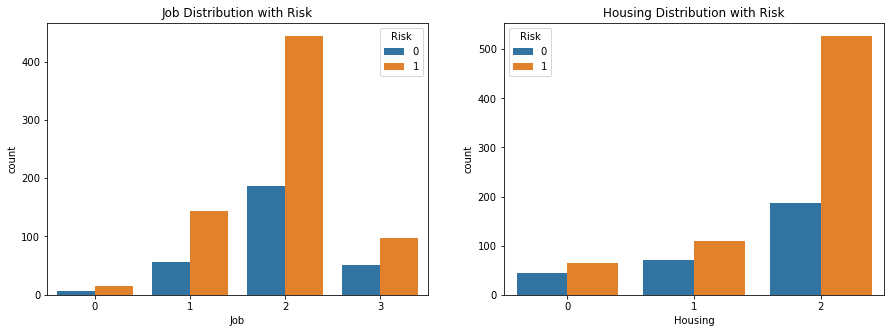

In [19]:
# Barplot of Job and Housing distribution vs Risk
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=risk, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk")
sns.countplot(data=risk, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk")

- Most of people in records have job skill level 2, but the job skill level does not affect the risk rating much.
- People who own a house means low risk and good rating to the bank.

Text(0.5, 1.0, 'Checking Account Quality Distribution with Risk')

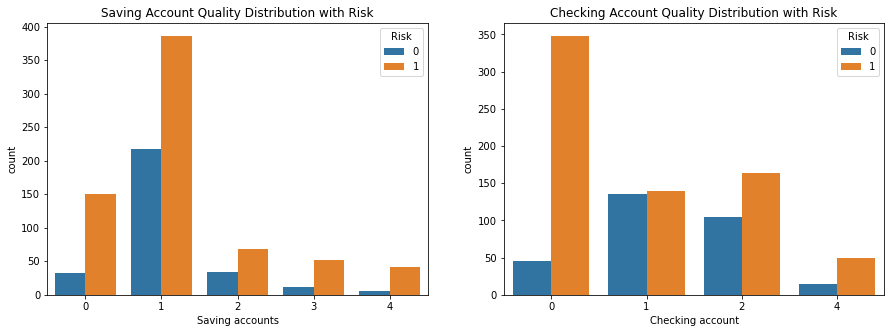

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=risk, x="Saving accounts", hue="Risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk")
sns.countplot(data=risk, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk")

(since 0 means unknown, only discuss quality level 1 to 4):

- The person with more saving means less risk to the bank, but most people in the records have little saving (not rich !)
- About half of people who have little checking account are considered as bad rating in risk.
- About 20% of people who have moderate checking account are considered as bad rating in risk.

### Step 5: Building Model

___Applying Logistic Regression, Decision Tree Classifier, Random Forest Classifier:___

In [21]:
X = risk.drop('Risk', axis = 1)
y = risk['Risk'] 

In [22]:
# 20% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [23]:
# Standardization process:
# it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1 
sc = StandardScaler()           
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
algos = [LogisticRegression(), 
          DecisionTreeClassifier(criterion='gini', random_state = 0)]

names = ['Logistic Regression',
        'Decision Tree Classifier']


precision_list = []
f1_list = []
recall_list = []

In [25]:
for name in algos:                                  # iterating the algorithms in the above list
    model = name                                    # name of the model applying
    model.fit(X_train,y_train)                      # fitting the train data
    y_pred = model.predict(X_test)                 # based on the fitted model, the test data is predicted
    precision = precision_score(y_test,y_pred)      # calculating precision
    f1 = f1_score(y_test, y_pred)                   # calculating f1
    recall = recall_score(y_test,y_pred)
    precision_list.append(precision)               # appending precision in the list
    f1_list.append(f1)                              # appending f1 in the list
    recall_list.append(recall)

In [27]:
evaluation = pd.DataFrame({'MODEL': names,
                           'PRECISION': precision_list,
                           'RECALL': recall_list,
                           'F1': f1_list
                           })

In [28]:
evaluation

,MODEL,PRECISION,RECALL,F1
0,Logistic Regression,0.769231,0.896552,0.828025
1,Decision Tree Classifier,0.783582,0.724138,0.752688


* As we can clearly see **Logistic Regression**, **Decision Tree Classifier** are all **performed well** and got the highest **Score** in **Logistic Regression** where the **F1 = 0.82**. 

* In this I am considering only **F1_Score** to say that **Risk Good** has predicted high by **all the model** we are used in here.